In [3]:
import pathlib
from IPython.display import Audio

#    <audiofile>
#       <fileID>B11-28100-3311-00625</fileID>
#       <instrument>B</instrument>
#       <instrumentsetting>1</instrumentsetting>
#       <playstyle>1</playstyle>
#       <midinr>28</midinr>
#       <string>1</string>
#       <fret>00</fret>
#       <fxgroup>3</fxgroup>
#       <fxtype>31</fxtype>
#       <fxsetting>1</fxsetting>
#       <filenr>00625</filenr>
#    </audiofile>


input_path = pathlib.Path("../../raw_data/Bass monophon/Samples/Chorus/B11-28100-3311-00625.wav")

Audio(input_path)


In [4]:
import librosa
import numpy as np

y, sr = librosa.load(
    input_path,
    sr=44100,
    dtype=np.float64,
)


/tmp/ipykernel_14426/2689065165.py:5: UserWarning: With fmin=30.000, sr=44100 and frame_length=2048, less than two periods of fmin fit into the frame, which can cause inaccurate pitch detection. Consider increasing to fmin=43.066 or frame_length=2941.
  f0, voiced_flag, voiced_probs = librosa.pyin(


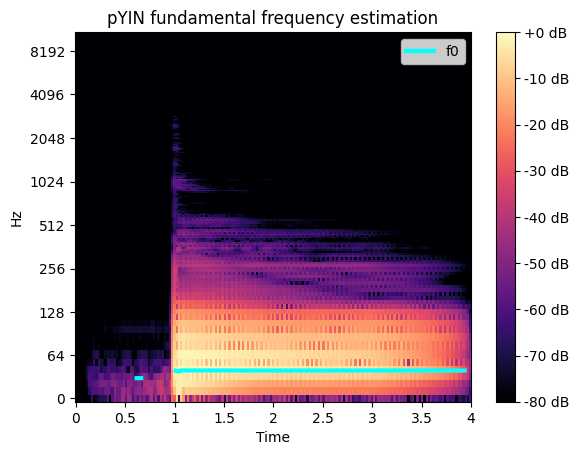

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# get the fundamental frequency
f0, voiced_flag, voiced_probs = librosa.pyin(
    y,
    fmin=30,
    fmax=librosa.note_to_hz('C7'),
    sr=sr,
    frame_length=2048,
    hop_length=256
)

# make a dataframe for easier plotting
import pandas as pd
df = pd.DataFrame({"f0": f0, "voiced_flag": voiced_probs, "voiced_probs": voiced_probs})
times = librosa.times_like(f0, sr=sr)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

fig, ax = plt.subplots()

img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)

ax.set(title='pYIN fundamental frequency estimation')

fig.colorbar(img, ax=ax, format="%+2.f dB")

ax.plot(times, f0, label='f0', color='cyan', linewidth=3)

ax.legend(loc='upper right')

In [9]:
# find the best pitch estimate
# first remove frame with low probability
df['cleaned'] = df.apply(lambda row: row['f0'] if row['voiced_probs'] > 0.02 else np.nan, axis=1)
# then take the median of the remaining frames
estimated_f0 = np.median(df['cleaned'].dropna())
print(f"Estimated fundamental frequency (f0): {estimated_f0:.2f} Hz")

Estimated fundamental frequency (f0): 41.46 Hz


In [10]:
# translate estimated f0 to note
note_name = librosa.hz_to_note(estimated_f0)
print(f"Estimated note: {note_name}")

Estimated note: E1


In [11]:
# translate note to french notation
note_mapping = {
    'C': 'Do',
    'C#': 'Do#',
    'D': 'Ré',
    'D#': 'Ré#',
    'E': 'Mi',
    'F': 'Fa',
    'F#': 'Fa#',
    'G': 'Sol',
    'G#': 'Sol#',
    'A': 'La',
    'A#': 'La#',
    'B': 'Si'
}
note_base = note_name[:-1]  # Remove octave number
french_note = note_mapping.get(note_base, note_base)
print(f"Estimated note in French notation: {french_note}")

Estimated note in French notation: Mi
